## EXPLORATORY DATA ANALYSIS

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('data/insurance.csv')

# Shape & first 5 rows
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Prelim information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Missing values -- none
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# No unusual categories -- clean data overall
print(df.sex.unique())
print(df.smoker.unique())
print(df.region.unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


### FEATURE ENGINEERING
- convert categorical object type columns to numeric type

In [6]:
# Distribution of categorical features
print(df.sex.value_counts(normalize=True), '\n')
print(df.smoker.value_counts(normalize=True), '\n')
print(df.region.value_counts(normalize=True))

male      0.505232
female    0.494768
Name: sex, dtype: float64 

no     0.795217
yes    0.204783
Name: smoker, dtype: float64 

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


### Positive class assignment:
- sex = male
- smoker = no
- region doesn't matter for multiclass

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Fortunately, the first row has female and yes to assign as 0
le = LabelEncoder()

# Sex -- female = 0, male = 1
df['sex'] = (df.sex == 'male').astype(int)

# Smoker -- yes = 0, no = 1
df['smoker'] = (df.smoker == 'no').astype(int)

# Region -- northeast = 0, northwest = 1, southeast = 2, southwest = 3
df['region'] = le.fit_transform(df['region'])

In [9]:
# Confirmed all numeric types
print(df.dtypes)
df.head()

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520


### FEATURE ANALYSIS
- distributions of continuous features

In [10]:
# Methods for 
def info(feature):
    print(f'MEAN: {round(df[feature].mean(),2)}')
    print(f'MODE: {df[feature].mode().values[0]}')
    
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    sns.boxplot(x=feature, data=df, orient='v', ax=ax[0])
    sns.distplot(df[feature], ax=ax[1]);

MEAN: 39.21
MODE: 18


/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


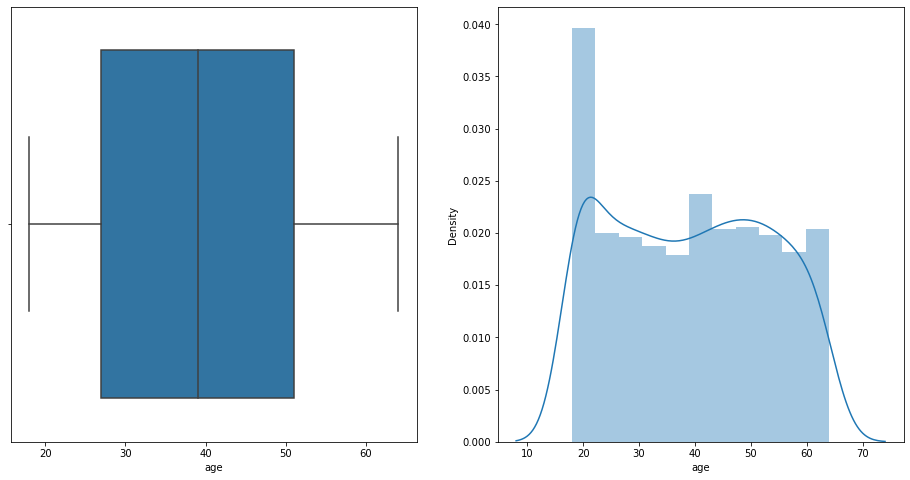

In [11]:
# Age
info('age')

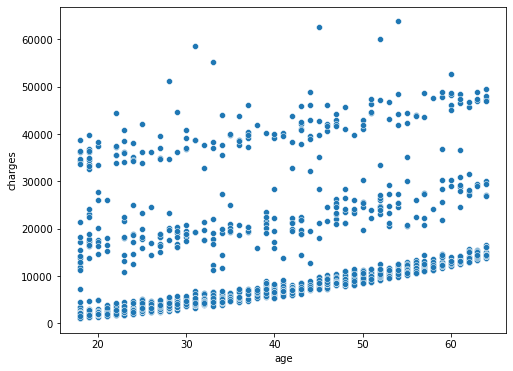

In [55]:
# Scatter of age
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.age, y=df.charges);

# Unsupervised clustering would be useful here

MEAN: 30.66
MODE: 32.3


/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


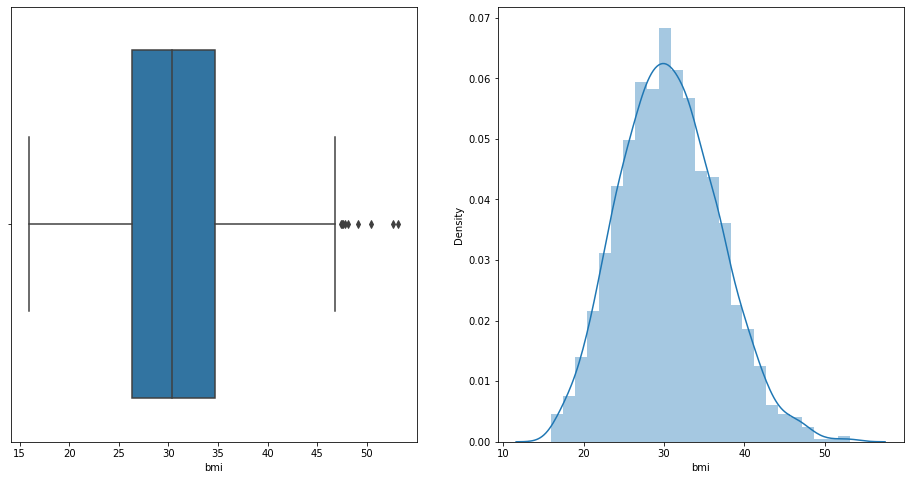

In [12]:
# BMI
info('bmi')

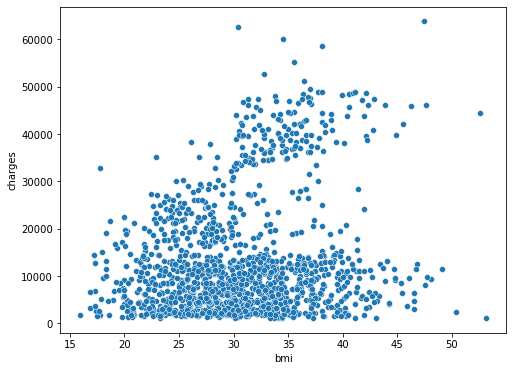

In [56]:
# SCatter of BMI
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.bmi, y=df.charges);

### Target Analysis

MEAN: 13270.42
MODE: 1639.5631


/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/kl/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


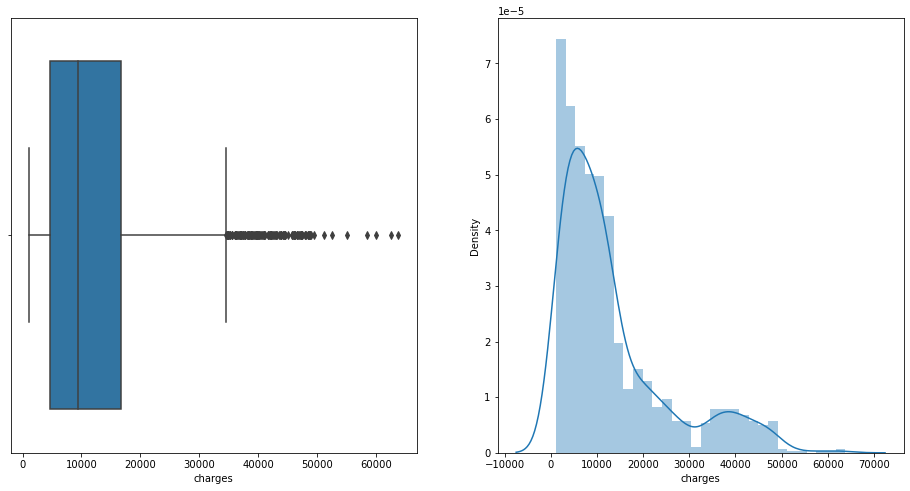

In [13]:
# Insurance charges (TARGET)
info('charges')

In [14]:
# Correlation


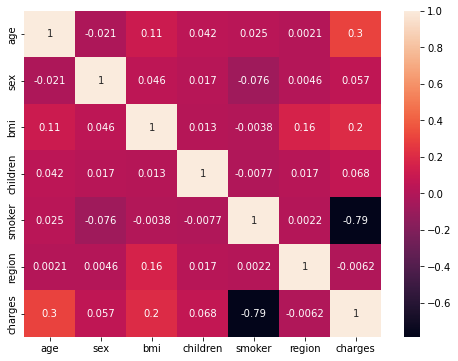

In [15]:
# Visualization
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True);

### Observation:
- little multi-collinearity, features are barely correlated to one another
- being a smoker has the strongest impact on insurance charges

In [16]:
df.to_csv('data/insurance_updated.csv', index=False)

## MODELING

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

def rmse(target, prediction):
    return np.sqrt(mean_squared_error(target, prediction))

In [18]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [19]:
# Pipeline method
def pipeCV(model, cv=3):
    #Pipeline transformer + estimator
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('regressor', model)
    ])

    cv_train = cross_val_score(pipe, X_train, y_train, cv=cv).mean()
    
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    print('SCORES')
    print(f'Training CV-R2: {cv_train}')
    print(f'Training R2: {pipe.score(X_train, y_train)}')
    print(f'Test R2: {pipe.score(X_test, y_test)}')
    print(f'Test RMSE: {rmse(y_test, pred)}')
    print(f'Test MAE: {mean_absolute_error(y_test, pred)}')

In [20]:
# Linear Regression
pipeCV(LinearRegression(), cv=5)

SCORES
Training CV-R2: 0.73394292442297
Training R2: 0.7417049283233981
Test R2: 0.7833463107364537
Test RMSE: 5799.587091438359
Test MAE: 4186.508898366437


In [21]:
# Ridge Regression
pipeCV(Ridge(), cv=5)

SCORES
Training CV-R2: 0.7339574325532207
Training R2: 0.7417042540295933
Test R2: 0.7833037457661384
Test RMSE: 5800.156772780014
Test MAE: 4187.971685427726


In [22]:
# Lasso Regression
pipeCV(Lasso(), cv=5)

SCORES
Training CV-R2: 0.7339515480455793
Training R2: 0.7417048844028533
Test R2: 0.7833293535279202
Test RMSE: 5799.814050147892
Test MAE: 4186.623542226471


### All too low
- trying random forest regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Manual standardizing
ss = StandardScaler().fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train_sc, y_train)

print('Training R2: ', rf.score(X_train_sc, y_train))
print('Test R2: ', rf.score(X_test_sc, y_test))

Training R2:  0.9752157816758112
Test R2:  0.8669133361234669


### Very overfit

In [25]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {'rf__criterion': ['mse', 'mae'],
          'rf__max_depth': [None, 1, 3, 5, 10],
#           'rf__min_samples_leaf': [3, 4, 5],
#           'rf__min_samples_split': [8, 10, 12],
          'rf__n_estimators': [100, 200, 300, 1000]
}

grid = GridSearchCV(Pipeline([('ss', StandardScaler()),
                              ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
                             ]),
                    params,
                    cv=3,
                    verbose=1)

grid.fit(X_train, y_train)
pred = grid.predict(X_test) 

print('TRAINING')
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')


## RESULTS SAVED
    # Fitting 3 folds for each of 40 candidates, totalling 120 fits
    # TRAINING
    # Best Parameters: {'rf__criterion': 'mse', 'rf__max_depth': 3, 'rf__n_estimators': 1000}
    # Best Score: 0.8457987134674331

Fitting 3 folds for each of 40 candidates, totalling 120 fits
TRAINING
Best Parameters: {'rf__criterion': 'mse', 'rf__max_depth': 3, 'rf__n_estimators': 1000}
Best Score: 0.8457987134674331


In [33]:
print('TESTING')
print(f'Test R2: {grid.score(X_test, y_test)}')
print(f'Test RMSE: {rmse(y_test, pred)}')
print(f'Test MAE: {mean_absolute_error(y_test, pred)}')

TESTING
Test R2: 0.8672539382162959
Test RMSE: 4539.675946854429
Test MAE: 2717.2743475938964


In [37]:
# Final fit of best gridsearchCV
gs_best = grid.best_estimator_
gs_best.fit(X_train, y_train)
print(gs_best.score(X_train, y_train))
print(gs_best.score(X_test, y_test))

0.8605063050032508
0.8672539382162959


### RESULT:
- Very low variance, but moderate amount of bias
- Scores:
    - TRAINING: 0.8605063050032508
    - TESTING: 0.8672539382162959

In [39]:
import pickle

# Saved
with open('rforest.pickle', 'wb') as handle:
    pickle.dump(gs_best, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,3,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,1,21984.47061
4,32,1,28.880,0,1,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,1,10600.54830
1334,18,0,31.920,0,1,0,2205.98080
1335,18,0,36.850,0,1,2,1629.83350
1336,21,0,25.800,0,1,3,2007.94500


## WITHOUT REGIONS

In [58]:
X_2 = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y_2 = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [45]:
params2 = {'rf__criterion': ['mse', 'mae'],
          'rf__max_depth': [None, 1, 3, 5, 10],
#           'rf__min_samples_leaf': [3, 4, 5],
#           'rf__min_samples_split': [8, 10, 12],
          'rf__n_estimators': [100, 200, 300, 1000]
}

grid2 = GridSearchCV(Pipeline([('ss', StandardScaler()),
                              ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
                             ]),
                    params,
                    cv=3,
                    verbose=1)

grid2.fit(X_train, y_train)

pred2 = grid2.predict(X_test) 

print('TRAINING')
print(f'Best Parameters: {grid2.best_params_}')
print(f'Best Score: {grid2.best_score_}')


## RESULTS SAVED
    # Fitting 3 folds for each of 40 candidates, totalling 120 fits
    # TRAINING
    # Best Parameters: {'rf__criterion': 'mse', 'rf__max_depth': 3, 'rf__n_estimators': 1000}
    # Best Score: 0.8457987134674331

Fitting 3 folds for each of 40 candidates, totalling 120 fits
TRAINING
Best Parameters: {'rf__criterion': 'mse', 'rf__max_depth': 5, 'rf__n_estimators': 200}
Best Score: 0.846101936592178


In [46]:
print('TESTING')
print(f'Test R2: {grid2.score(X_test, y_test)}')
print(f'Test RMSE: {rmse(y_test, pred2)}')
print(f'Test MAE: {mean_absolute_error(y_test, pred2)}')

TESTING
Test R2: 0.8717556417198307
Test RMSE: 4462.036972501775
Test MAE: 2561.659988524293


In [47]:
# Final fit of best gridsearchCV
gs_best2 = grid.best_estimator_
gs_best2.fit(X_train, y_train)
print(gs_best2.score(X_train, y_train))
print(gs_best2.score(X_test, y_test))

0.8605065618632126
0.8672546153806103


In [48]:
# Saved
with open('rforest2.pickle', 'wb') as handle:
    pickle.dump(gs_best2, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [59]:
# Saved standard scalar fit for web app

ss = StandardScaler().fit(X_train)

with open('standard_scalar.pickle', 'wb') as handle:
    pickle.dump(ss, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
params2 = {'rf__criterion': ['mse', 'mae'],
          'rf__max_depth': [None, 1, 3, 5, 10],
          'rf__min_samples_leaf': [1, 3, 4, 5],
          'rf__min_samples_split': [1, 8, 10, 12],
          'rf__n_estimators': [100, 200, 300, 1000]
}

grid2 = GridSearchCV(Pipeline([('ss', StandardScaler()),
                              ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
                             ]),
                    params,
                    cv=5,
                    verbose=1)

grid2.fit(X_train, y_train)
pred2 = grid2.predict(X_test) 

print('TRAINING')
print(f'Best Parameters: {grid2.best_params_}')
print(f'Best Score: {grid2.best_score_}')


## RESULTS SAVED
    # Fitting 3 folds for each of 40 candidates, totalling 120 fits
    # TRAINING
    # Best Parameters: {'rf__criterion': 'mse', 'rf__max_depth': 3, 'rf__n_estimators': 1000}
    # Best Score: 0.8457987134674331

Fitting 5 folds for each of 40 candidates, totalling 200 fits
TRAINING
Best Parameters: {'rf__criterion': 'mse', 'rf__max_depth': 3, 'rf__n_estimators': 100}
Best Score: 0.8454243590392171


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

- polynomial
- neural network
